In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split, cross_val_score
import xgboost as xgb
import seaborn as sns
np.random.seed(42)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
plt.style.use('ggplot')

In [3]:
train = pd.read_csv('/media/alex/DACC103ACC10137D/ML/ML5/train.csv',sep=';')

In [4]:
test = pd.read_csv('/media/alex/DACC103ACC10137D/ML/ML5/test.csv',sep=';')

In [5]:
train['age1'] = train.age / 366
train['age2'] = train.age / 365
test['age1'] = train.age / 366
test['age2'] = test.age / 365


In [6]:
for num , i in enumerate(train.ap_hi):
    if (i>1000 and i<3000):
        train.loc[num:num,'ap_hi']= i/100

In [7]:
for num , i in enumerate(train.ap_hi):
    if (i>3000 and i<30000):
        train.loc[num:num,'ap_hi']= i/1000

In [8]:
for num , i in enumerate(train.ap_hi):
    if (i>250 and i<1000):
        train.loc[num:num,'ap_hi']= i/10

In [9]:
for num , i in enumerate(train.ap_hi):
    if (i<0):
        train.loc[num:num,'ap_hi']= abs(i)

In [10]:
for num , i in enumerate(train.ap_hi):
    if (i<50):
        train.loc[num:num,'ap_hi']= i * 10

In [11]:
for num , i in enumerate(train.ap_lo):
    if (i>2500 and i<15000):
        train.loc[num:num,'ap_lo']= i/100

In [12]:
for num , i in enumerate(train.ap_lo):
    if (i>500 and i<5000):
        train.loc[num:num,'ap_lo']= i/10

In [13]:
for num , i in enumerate(test.ap_hi):
    if (i>2000 and i<30000):
        test.loc[num:num,'ap_hi']= i/1000

In [14]:
for num , i in enumerate(test.ap_hi):
    if (i>250 and i<2000):
        test.loc[num:num,'ap_hi']= i/10

In [15]:
for num , i in enumerate(test.ap_hi):
    if (i<0):
        test.loc[num:num,'ap_hi']= abs(i)

In [16]:
for num , i in enumerate(test.ap_hi):
    if (i<50):
        test.loc[num:num,'ap_hi']= i * 10

In [17]:
for num , i in enumerate(test.ap_lo):
    if (i>2000 and i<15000):
        test.loc[num:num,'ap_lo']= i/100

In [18]:
for num , i in enumerate(test.ap_lo):
    if (i>200 and i<5000):
        test.loc[num:num,'ap_lo']= i/10

In [19]:
for num , i in enumerate(test.ap_lo):
    if (i<0):
        test.loc[num:num,'ap_lo']= abs(i)

In [20]:

train.loc[40330:40330,'ap_hi'] = 130
train.loc[40831:40831,'ap_hi'] = 140



In [21]:
for num , i in enumerate(test.smoke):
    if (i=='None'):
        test.loc[num:num,'smoke']=0
        
for num , i in enumerate(test.alco):
    if (i=='None'):
        test.loc[num:num,'alco']=0

        
for num , i in enumerate(test.active):
    if (i=='None'):
        test.loc[num:num,'active']=0

In [22]:
#train.smoke = train.smoke.astype(int)
#train.alco = train.alco.astype(int)
#train.active = train.active.astype(int)

In [23]:
test.smoke = test.smoke.astype(int)
test.alco = test.alco.astype(int)
test.active = test.active.astype(int)

In [24]:
train_smoke_dum = pd.get_dummies(train.smoke,prefix='smoke')
train_alco_dum = pd.get_dummies(train.alco,prefix='alco')
train_active_dum = pd.get_dummies(train.active,prefix='active')
train_cholesterol_dum = pd.get_dummies(train.cholesterol,prefix='cholesterol')
train_gluc_dum = pd.get_dummies(train.gluc,prefix='gluc')

In [25]:
test_smoke_dum = pd.get_dummies(test.smoke,prefix='smoke')
test_alco_dum = pd.get_dummies(test.alco,prefix='alco')
test_active_dum = pd.get_dummies(test.active,prefix='active')
test_cholesterol_dum = pd.get_dummies(test.cholesterol,prefix='cholesterol')
test_gluc_dum = pd.get_dummies(test.gluc,prefix='gluc')

In [26]:
full_train = pd.concat([train,train_smoke_dum,train_alco_dum,train_active_dum,train_cholesterol_dum,train_gluc_dum],axis=1)

In [27]:
full_test = pd.concat([test,test_smoke_dum,test_alco_dum,test_active_dum,test_cholesterol_dum,test_gluc_dum],axis=1)

In [28]:
full_train['AP'] = 0.0011*75 + 0.014*full_train['ap_hi'] + 0.008*full_train['ap_lo'] + 0.009*full_train['weight'] - 0.009*full_train['height'] + 0.014*full_train['age2'] - 0.27
full_test['AP'] = 0.0011*75 + 0.014*full_test['ap_hi'] + 0.008*full_test['ap_lo'] + 0.009*full_test['weight'] - 0.009*full_test['height'] + 0.014*full_test['age2'] - 0.27

In [29]:
full_train['mpi'] = full_train['weight']/((full_train['height']/100)**2)
full_test['mpi'] = full_test['weight']/((full_test['height']/100)**2)

In [30]:
full_train.head(2)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age1,age2,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,AP,mpi
0,0,18393,2,168,62.0,110.0,80.0,1,1,0,0,1,0,50.254098,50.391781,1,0,1,0,0,1,1,0,0,1,0,0,1.743985,21.967120
1,1,20228,1,156,85.0,140.0,90.0,3,1,0,0,1,1,55.267760,55.419178,1,0,1,0,0,1,0,0,1,1,0,0,2.629368,34.927679


/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):
/usr/local/lib/python3.5/dist-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


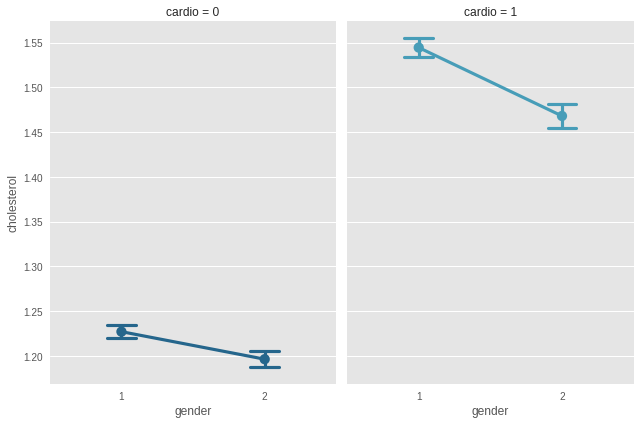

In [31]:
plt.figure(figsize=(15,8))
g = sns.factorplot(x="gender", y="cholesterol", hue="cardio", col="cardio", data=train,
                   capsize=.2, palette="YlGnBu_d", size=6, aspect=.75)
g.despine(left=True)

plt.show(g)

In [32]:
np.random.seed(42)
X_train, X_test, y_train, y_test  = train_test_split(
    full_train.drop('cardio',axis=1) ,
    full_train.cardio.values, test_size=0.35)

In [33]:
np.random.seed(42)
dtrain = xgb.DMatrix(X_train,y_train)
dvalid = xgb.DMatrix(X_test,y_test)
dtest = xgb.DMatrix(full_test)
dtrain_f = xgb.DMatrix(full_train.drop('cardio',axis=1),full_train.cardio)

In [34]:
np.random.seed(42)
param = {'max_depth':4,
         'eta':0.002,
         'silent':1,
         'objective':'binary:logistic',
         'tree_method':'hist',
         'seed':42,
         'subsample':0.6,
         'updater':'grow_gpu'
         }

param['eval_metric'] = ['logloss','auc']

In [35]:
np.random.seed(42)
trees = 20000

cv = xgb.cv(param, dtrain_f, metrics=('logloss'), show_stdv=True,
            num_boost_round=trees,nfold=10,early_stopping_rounds = 500)

test-logloss-mean     0.538405
test-logloss-std      0.004069
train-logloss-mean    0.528292
train-logloss-std     0.000474
Name: 5213, dtype: float64


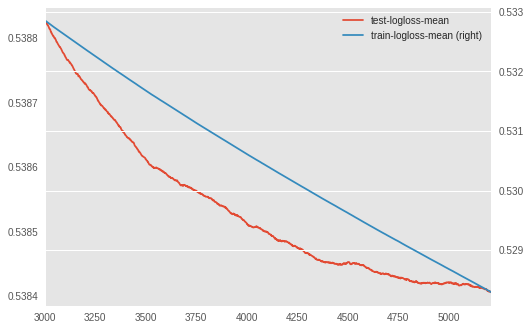

In [36]:
cv[3000:].plot(y=['test-logloss-mean', 'train-logloss-mean'], secondary_y='train-logloss-mean')
print (cv.loc[cv['test-logloss-mean'].argmin()])
trees = cv['test-logloss-mean'].argmin()
plt.show()

In [41]:
%%time
np.random.seed(42)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
clf = xgb.train(param, dtrain_f, 5213,   verbose_eval=550)

CPU times: user 2min 35s, sys: 472 ms, total: 2min 36s
Wall time: 45.6 s


In [42]:
np.random.seed(42)
subm = clf.predict(dtest,ntree_limit=clf.best_ntree_limit)

In [43]:
np.random.seed(42)
a = pd.DataFrame(subm)
a.to_csv('subm_new_S.csv',index=None,header=None)

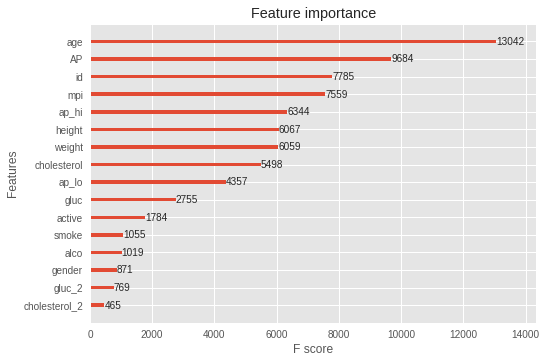

In [44]:
plt.figure(figsize=(15,8))
xgb.plot_importance(clf);
plt.show();